<a href="https://colab.research.google.com/github/ha-yun/GSTEC/blob/main/210913.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹애플리케이션

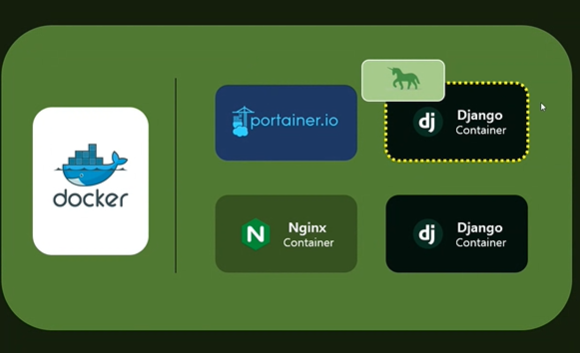

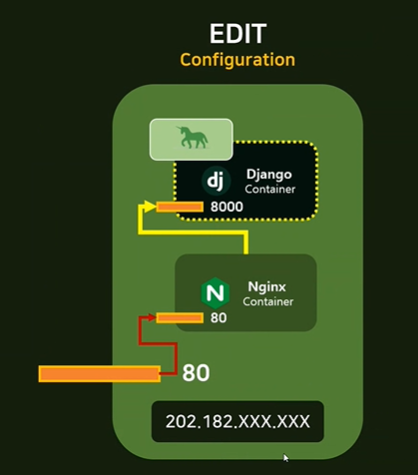

STATIC + DYNAMIC   
{{}}, for, if,  : 동적 


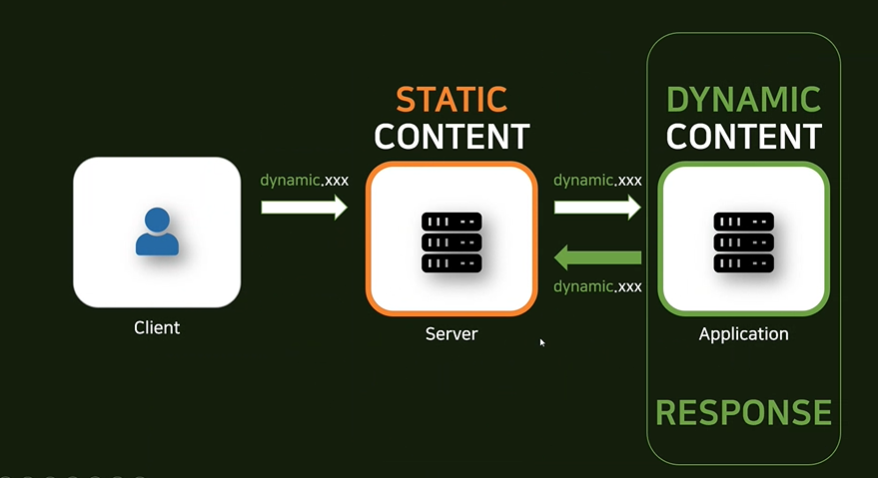

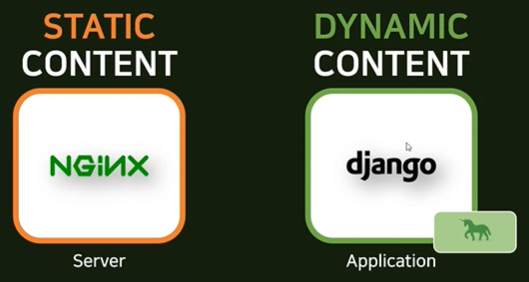

1. Collect static content from django container
2. Synchronize static contents with nginx container

aws부터  
- 실습
terminal 창에  
python manage.py collectstatic  
staticfiles가 생기는거 확인


In [ ]:
# gsweb\Dockerfile
FROM python:3.9.0

WORKDIR /home/

RUN git clone https://github.com/yun-aha/GSWEB.git

WORKDIR /home/GSWEB/

RUN echo "SECRET_KEY=django-insecure-vh!g-^f)eu138bc(2^84w@sbb4m5c5m7t-fpd*##y2ok@w_m8-" > .env

RUN pip install -r requirements.txt

RUN pip install gunicorn

RUN python manage.py migrate

RUN python manage.py collectstatic

EXPOSE 8000

CMD ["gunicorn", "gsweb.wsgi", "--bind", "0.0.0.0:8000"]


dockerfile에 입력한 후 image생성  ha_django:3

Docker Volume
1. Bind Volume
2. Named Volume

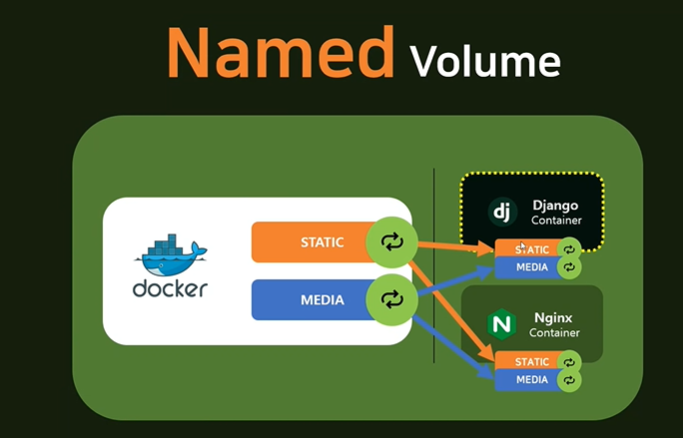

Volumes  
ha_media, ha_static을 만들어준다.  
django container 생성(volumes 두개와 network를 지정)  


- nginx.conf  
mime.types  


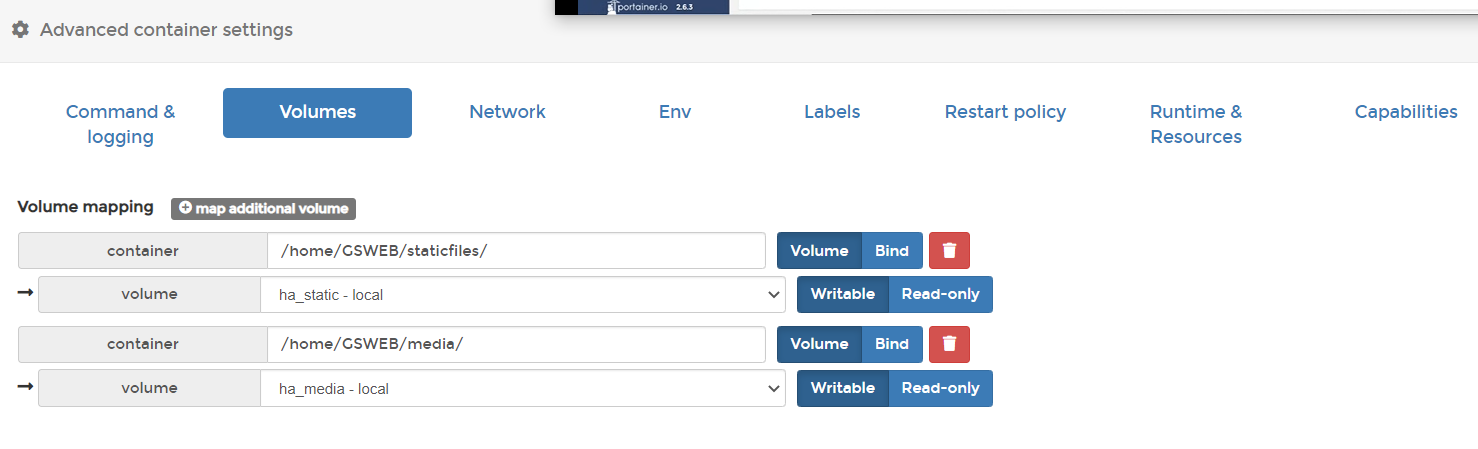

In [ ]:
worker_processes auto;

events{
}

http {
  server {
    listen 80;

    include mime.types;

    location /static/ {
        alias /data/static/;
    }

    location /media/ {
        alias /data/media/;
    }

    location / {
        proxy_pass http://django:8000;
        proxy_set_header Host $host;
        proxy_set_header X-Forwarded-For $proxy_add_x_forwarded_for;
    }
  }
}

filezilla에 nginx.conf를 업로드해준다.  
nginx container를 생성해준다.(volumes3개, network, port 80지정)

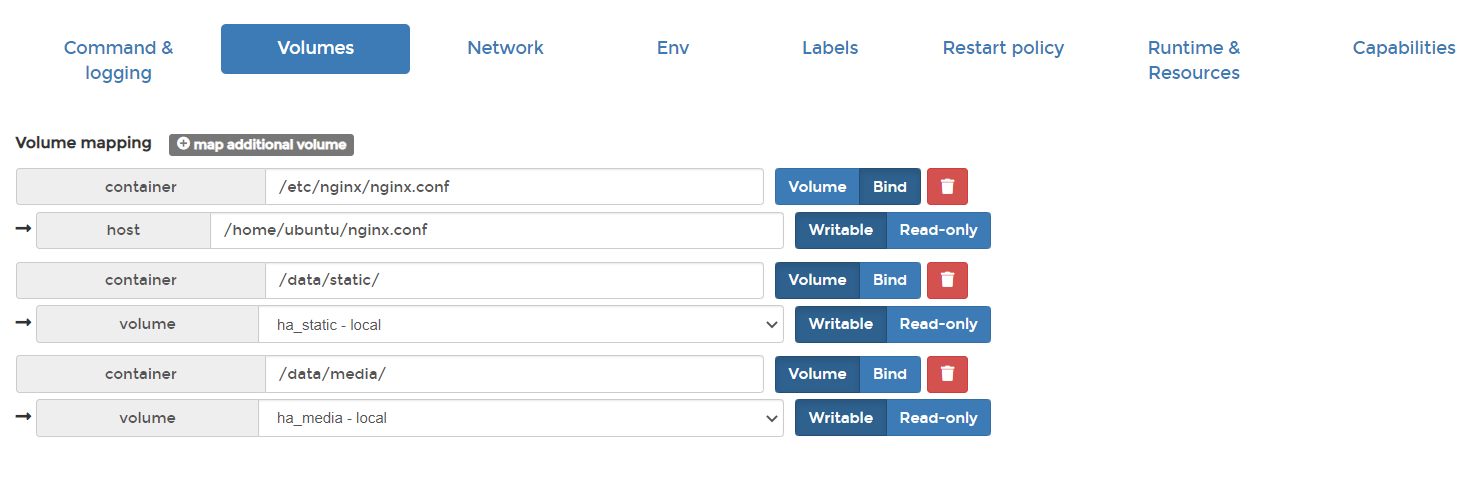

# 2. 알고리즘

백준 15649

In [ ]:
# N과 M(1)
N, M = list(map(int,input().split()))
M_list = [False]*(N+1)

def select_nums_combination(now_idx, selected_list, used_list, n, m):
    if now_idx == m:
        print(" ".join(map(str, selected_list)))
        return

    for i in range(1, n+1):
        if not used_list[i]:
            used_list[i] = True
            select_nums_combination(now_idx+1, selected_list+[i], used_list, n, m)
            used_list[i] = False

select_nums_combination(0, [], M_list, N, M)


3 1
1
2
3
